## 연습문제2. 피마인디언 당뇨병 예측

피마 인디언 당뇨병(Pima Indian Diabetes) 데이터를 이용하여 당뇨병 여부를 판단하는 머신러닝 예측 모델을 생성하고, 성능을 측정하시오.

In [18]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 1. 필요한 모듈 임포트

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
X = df.drop(columns = 'Outcome')
y = df['Outcome']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020158011)

In [23]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [24]:
p_test_pred = clf.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print('- Accuracy (Test) : {:.4}'.format(accuracy_score(y_test,p_test_pred)))

- Accuracy (Test) : 0.7338


In [27]:
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.metrics import  roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

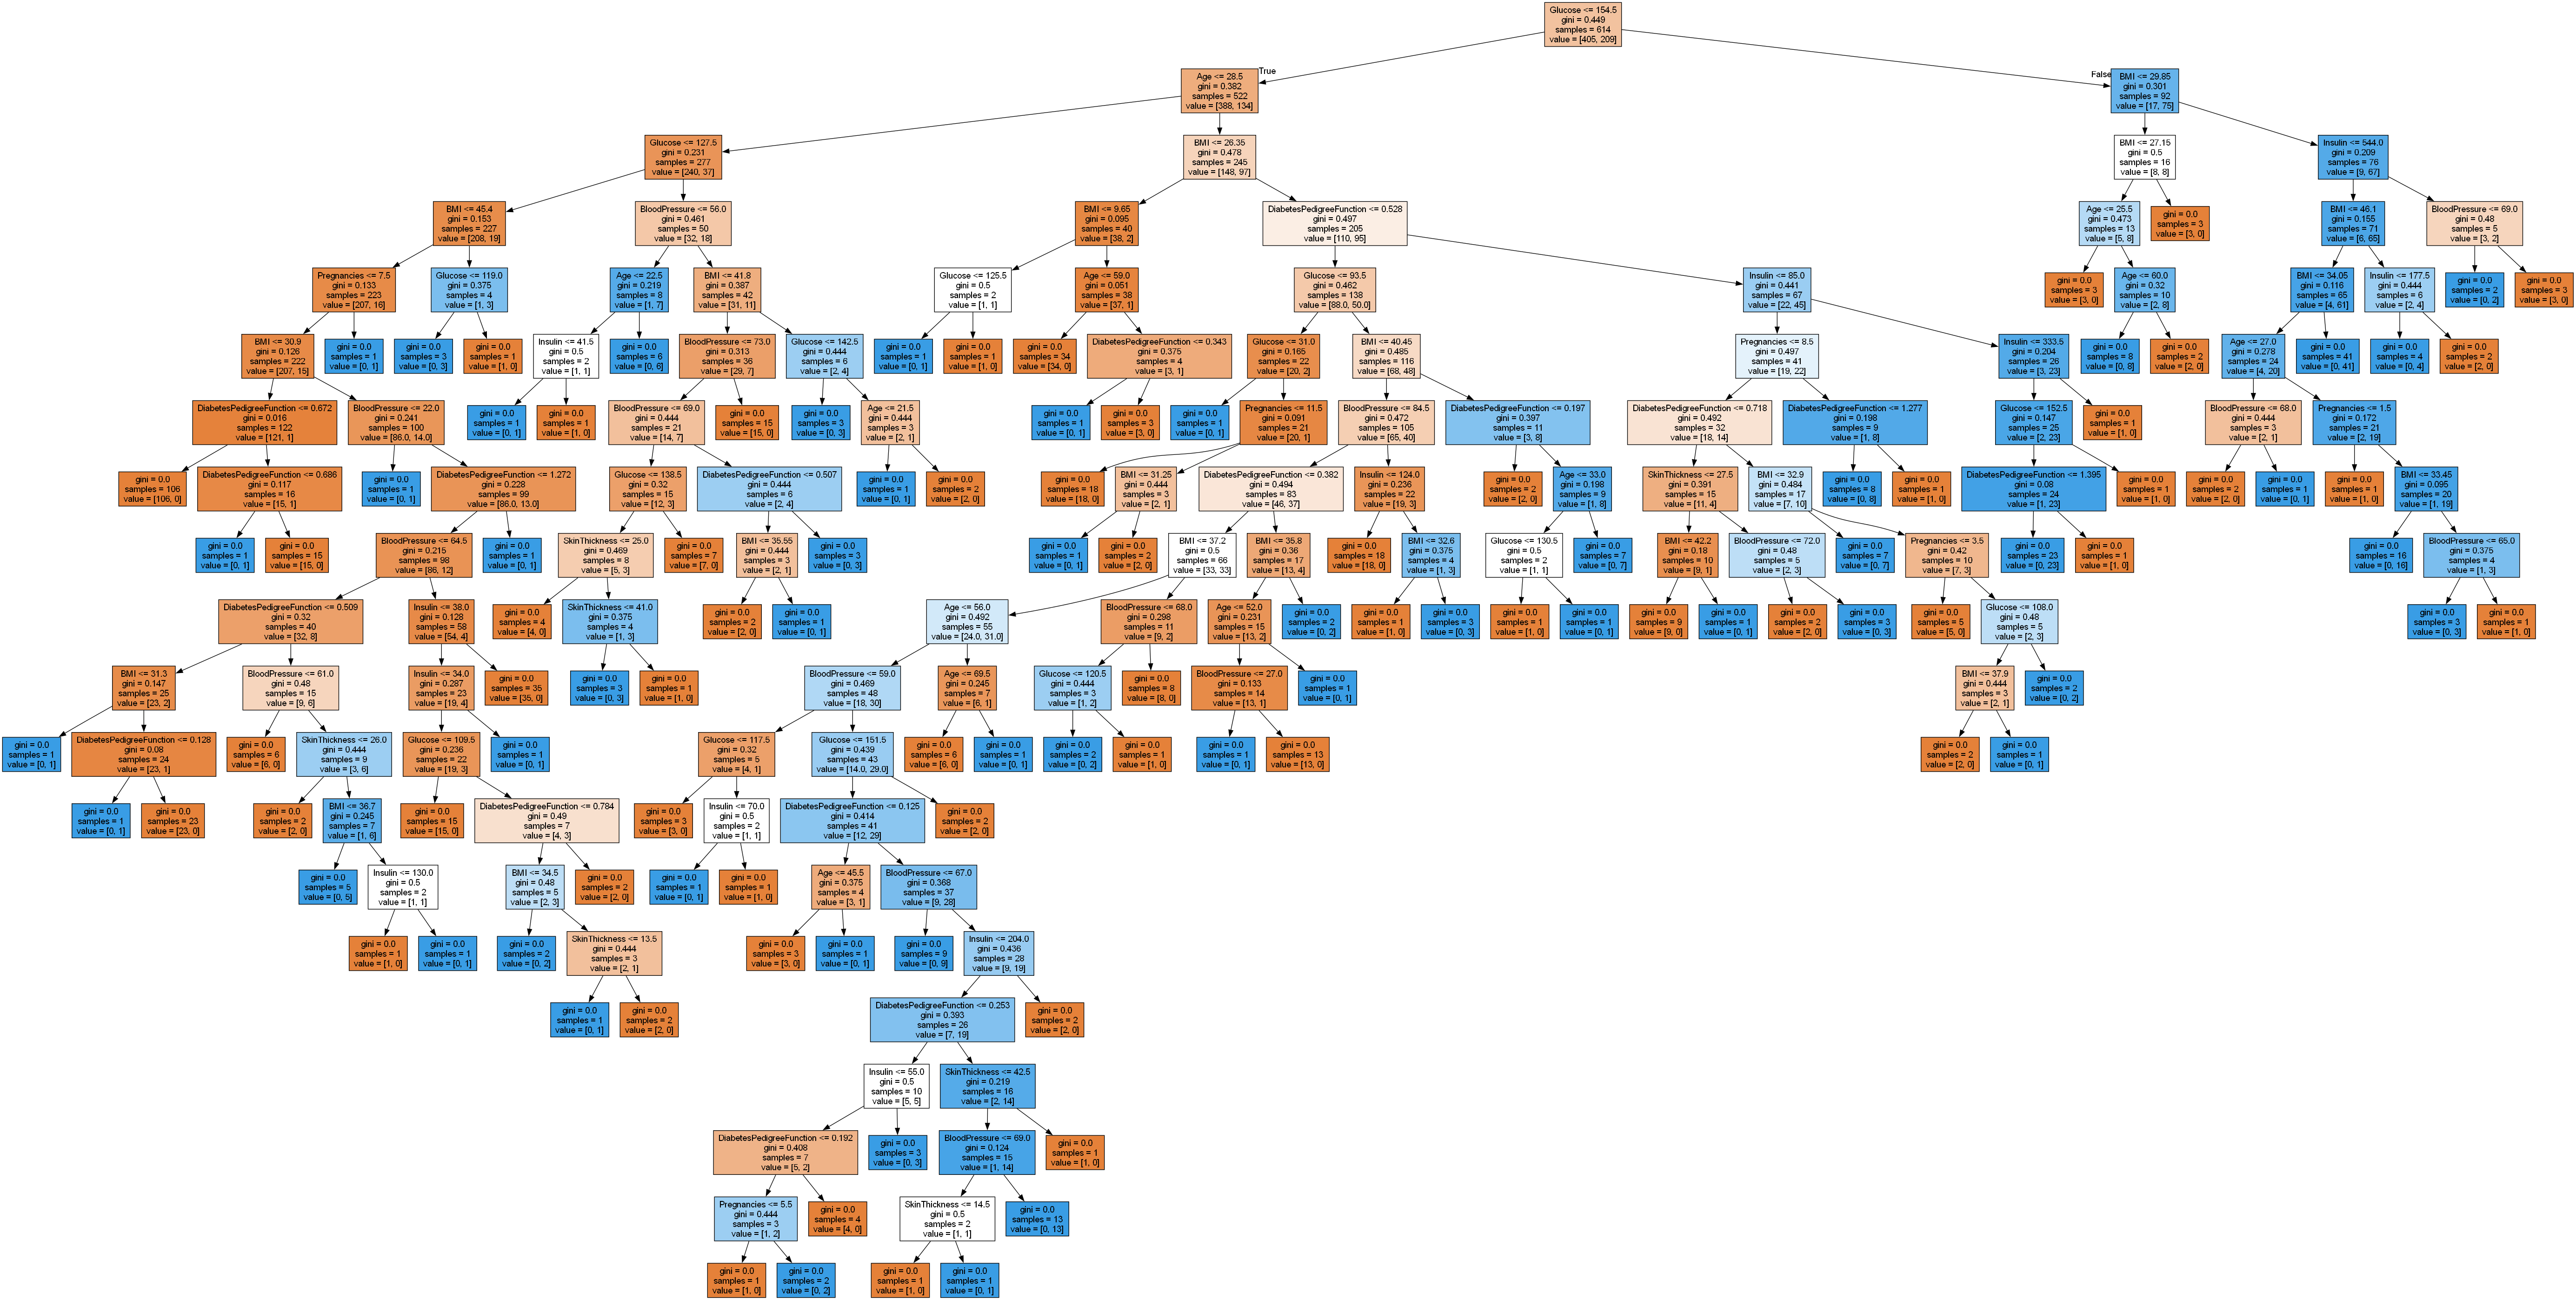

In [28]:
graph = Source(export_graphviz(clf,
                               out_file=None,
                               feature_names=X.columns,
                               filled=True,
                               leaves_parallel=False))
Image(graph.pipe(format='png'))

In [ ]:
DecisionTreeClassifier

In [45]:
study.best_params

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_split': 18,
 'min_samples_leaf': 14}

In [44]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
def objective(trial):
    criterion=trial.suggest_categorical('criterion',['gini','entropy', 'log_loss'])
    max_depth= trial.suggest_int('max_depth',1, 20)
    min_samples_split=trial.suggest_int('min_samples_split',2, 20)
    min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 20)

    clf = DecisionTreeClassifier(
    criterion = criterion,
    max_depth = max_depth,
    min_samples_split = min_samples_split,
    min_samples_leaf = min_samples_leaf,
    random_state = 2020158011
    )
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print("Best hyperparameters:", study.best_params)
print("Best cross-validation accuracy:", study.best_value)

best_params = study.best_params
best_model = DecisionTreeClassifier(**best_params, random_state=random_state)
best_model.fit(X_train, y_train)
test_acc = accuracy_score(y_test, best_model.predict(X_test))
print("Validation accuracy with best model:", test_acc)

[I 2025-10-21 10:02:52,171] A new study created in memory with name: no-name-7f372788-2d99-4e3a-b2c0-543506aaee2d
[I 2025-10-21 10:02:52,195] Trial 0 finished with value: 0.8131601210191997 and parameters: {'criterion': 'log_loss', 'max_depth': 5, 'min_samples_split': 18, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.8131601210191997.
[I 2025-10-21 10:02:52,214] Trial 1 finished with value: 0.7935726473666854 and parameters: {'criterion': 'log_loss', 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 16}. Best is trial 0 with value: 0.8131601210191997.
[I 2025-10-21 10:02:52,242] Trial 2 finished with value: 0.7450696147173111 and parameters: {'criterion': 'log_loss', 'max_depth': 20, 'min_samples_split': 12, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8131601210191997.
[I 2025-10-21 10:02:52,261] Trial 3 finished with value: 0.7832336788976356 and parameters: {'criterion': 'log_loss', 'max_depth': 3, 'min_samples_split': 12, 'min_samples_leaf': 4}. Best is

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 18, 'min_samples_leaf': 14}
Best cross-validation accuracy: 0.8229778752813983
Validation accuracy with best model: 0.7012987012987013


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import optuna 

def objective(trial):
    criterion=trial.suggest_categorical('criterion',['gini','entropy','log_loss'])
    max_depth=trial.suggest_int('max_depth', 1, 20)
    min_samples_split=trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 20)

    clf = DecisionTreeClassifier(
        criterion = criterion,
        max_depth = max_depth,
        min_samples_split = min_samples_split,
        min_samples_leaf = min_samples_leaf
    )
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print(f'best hyperparameter : {study.best_params}')
print(f'best cross val score : {study.best_value}')

In [48]:
best_params = study.best_params
best_model = DecisionTreeClassifier(**best_params, random_state=2020158011)
best_model.fit(X_train, y_train)
best_roc_auc_score = roc_auc_score(y_test, best_model.predict(X_test))
best_roc_auc_score

0.6785013380909901

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print(study.best_params)
print(study.best`_v`ales)~`````

In [29]:
dt_clf = DecisionTreeClassifier(random_state=2020158011)
params = {'min_samples_split' : [2, 4, 8, 16, 24],
          'max_depth' : [2, 3, 4, 6, 8, 10],
          'min_samples_leaf' : [1, 3, 5, 7, 9, 15]}
grid = GridSearchCV(dt_clf, param_grid=params, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

,estimator,DecisionTreeC...te=2020158011)
,param_grid,"{'max_depth': [2, 3, ...], 'min_samples_leaf': [1, 3, ...], 'min_samples_split': [2, 4, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [30]:
## from sklearn.model_selection import cross_val_score
depth_range = range(2, 21)
score_list=[]
for depth in depth_range:
    dt_clf = DecisionTreeClassifier(max_depth=depth,random_state=2020158011)
    scores = cross_val_score(dt_clf, X_train, y_train,scoring='roc_auc', cv=5)
    score_list.append(np.round(np.mean(scores),5))

result_df = pd.DataFrame({'maxDepth' : depth_range, 'ROC_AUC' : score_list})

In [31]:
best_score = result_df['ROC_AUC'].max()
best_score_idx = result_df['ROC_AUC'].argmax()

#### 2. 데이터 로딩 및 탐색

In [32]:
result_df = pd.DataFrame(grid.cv_results_)[['params','mean_test_score','rank_test_score']]
result_df.sort_values(['rank_test_score'])

,params,mean_test_score,rank_test_score
115,"{'max_depth': 6, 'min_samples_leaf': 15, 'min_...",0.809078,1
117,"{'max_depth': 6, 'min_samples_leaf': 15, 'min_...",0.809078,1
118,"{'max_depth': 6, 'min_samples_leaf': 15, 'min_...",0.809078,1
116,"{'max_depth': 6, 'min_samples_leaf': 15, 'min_...",0.809078,1
119,"{'max_depth': 6, 'min_samples_leaf': 15, 'min_...",0.809078,1
...,...,...,...
155,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_...",0.711389,175
121,"{'max_depth': 8, 'min_samples_leaf': 1, 'min_s...",0.708621,177
120,"{'max_depth': 8, 'min_samples_leaf': 1, 'min_s...",0.707891,178
150,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.698622,179


In [33]:
result_df[result_df['rank_test_score'] == 1]

,params,mean_test_score,rank_test_score
115,"{'max_depth': 6, 'min_samples_leaf': 15, 'min_...",0.809078,1
116,"{'max_depth': 6, 'min_samples_leaf': 15, 'min_...",0.809078,1
117,"{'max_depth': 6, 'min_samples_leaf': 15, 'min_...",0.809078,1
118,"{'max_depth': 6, 'min_samples_leaf': 15, 'min_...",0.809078,1
119,"{'max_depth': 6, 'min_samples_leaf': 15, 'min_...",0.809078,1


In [34]:
best_clf = grid.best_estimator_
pred = best_clf.predict(X_test)
pred_proba = best_clf.predict_proba(X_test)[:,1]
print(f'best RPC_AUC : {roc_auc_score(y_test, pred_proba) :.4f}')

best RPC_AUC : 0.7887


#### 3. 제약조건을 주지 않은 경우의 결정트리 생성

- feature importances 시각화
- depth와 leaf 노드수를 출력

#### 4. max_depth를 2에서 20까지 변화시켜가면서 최적의 성능을 주는 max_depth 찾기
- roc_auc와 recall 지표 사용

#### 5. GridSearchCV를 이용하여 최적의 성능을 가지는 하이퍼파라미터 찾기
- min_samples_split = {2, 4, 8, 16, 24}
- max_depth = {2, 3, 4, 6, 8, 10}
- min_samples_leaf = {1, 3, 5, 7, 9, 15}
- 성능지표는 roc_auc_score로 지정

#### 6. 5번에서 찾은 최적의 성능을 갖는 estimator를 이용하여 예측 평가

----